In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pickle

# 1. Load Data
# Ensure the path is correct for your local machine
KAGGLE_FILE_PATH = r"C:\Users\hsubh\Downloads\mnist.npz"
with np.load(KAGGLE_FILE_PATH) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']

# 2. Preprocess
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Build Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# 4. Compile Model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train Model
print("Starting training...")
model.fit(x_train, y_train, epochs=2)

# 6. Evaluate
print("\nStarting evaluation...")
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy: {acc*100:.2f}%")

# 7. Save Model as Pickle
# We open the file in 'wb' (write binary) mode
pickle_filename = "mnist_model.pkl"
print(f"\nSaving model as {pickle_filename}...")
with open(pickle_filename, "wb") as f:
    pickle.dump(model, f)

# 8. Demonstrate Loading the Pickled Model
print("Loading model back from pickle...")
with open(pickle_filename, "rb") as f:
    loaded_model = pickle.load(f)

# 9. Verify Loaded Model
print("\nMaking predictions with loaded model for first 5 images:")
pred = loaded_model.predict(x_test[:5])
predicted_digits = np.argmax(pred, axis=1)
print("Predicted digits:", predicted_digits)
print("True labels:", y_test[:5])


c:\Users\hsubh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Starting training...
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8419 - loss: 0.6324
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9078 - loss: 0.3312

Starting evaluation...
Accuracy: 92.08%

Saving model as mnist_model.pkl...
Loading model back from pickle...

Making predictions with loaded model for first 5 images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted digits: [7 2 1 0 4]
True labels: [7 2 1 0 4]


In [2]:
import os
print(f"The model is saved at: {os.path.join(os.getcwd(), 'mnist_model.pkl')}")


The model is saved at: c:\Users\hsubh\Downloads\mnist_model.pkl


In [3]:
import tensorflow as tf
import numpy as np
import pickle

# 1. Load the model from the pickle file
pickle_filename = "mnist_model.pkl"
print(f"Loading model from {pickle_filename}...")

with open(pickle_filename, "rb") as f:
    loaded_model = pickle.load(f)

# 2. Prepare test data (ensure it matches training format)
# Note: In a real scenario, you would load your actual new data here
mnist = tf.keras.datasets.mnist
(_, _), (x_test, y_test) = mnist.load_data()
x_test = x_test / 255.0  # Crucial: Must normalize like training!

# 3. Test the model's accuracy
print("\nEvaluating loaded model performance...")
loss, acc = loaded_model.evaluate(x_test, y_test, verbose=0)
print(f"Restored model accuracy: {acc*100:.2f}%")

# 4. Make individual predictions
print("\nTesting on first 5 images...")
predictions = loaded_model.predict(x_test[:5])
predicted_classes = np.argmax(predictions, axis=1)

print(f"Predicted: {predicted_classes}")
print(f"Actual:    {y_test[:5]}")


Loading model from mnist_model.pkl...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

Evaluating loaded model performance...
Restored model accuracy: 92.08%

Testing on first 5 images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted: [7 2 1 0 4]
Actual:    [7 2 1 0 4]


In [4]:
import os

file_path = "mnist_model.pkl"
# getsize returns bytes, divide by 1024 for KB
size_kb = os.path.getsize(file_path) / 1024

print(f"File Size: {size_kb:.2f} KB")



File Size: 417.60 KB


In [5]:
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Text(0.5, 1.0, 'predicted:[[2.75356637e-04 1.69666248e-06 2.37161395e-04 1.73411972e-03\n  2.40992995e-05 8.68187635e-05 9.65907248e-07 9.94599342e-01\n  1.27018560e-04 2.91345967e-03]\n [3.54252290e-03 1.65653692e-04 8.88520598e-01 2.14903187e-02\n  3.64339212e-06 1.29046664e-02 6.48955032e-02 1.60882678e-07\n  8.47490225e-03 2.03188733e-06]\n [1.30446148e-04 9.68027294e-01 1.10185165e-02 3.98947159e-03\n  7.58480746e-04 1.76262611e-03 3.21953674e-03 3.53753963e-03\n  6.44446723e-03 1.11162977e-03]\n [9.98167276e-01 4.62121896e-09 1.48636289e-04 4.60250521e-05\n  2.46783685e-07 1.08933903e-03 3.38261423e-04 6.30978029e-05\n  9.91277120e-05 4.79449554e-05]\n [1.96933770e-03 2.54092865e-05 9.73366201e-03 5.40680077e-04\n  8.95198882e-01 1.14605890e-03 5.85654425e-03 7.27365073e-03\n  9.97465756e-03 6.82810321e-02]]')

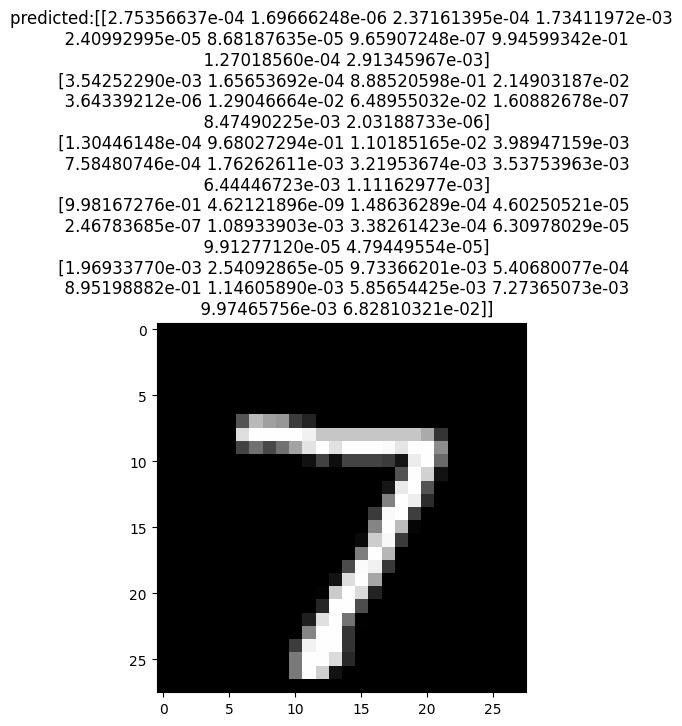

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0],cmap='gray')
plt.title("predicted:" +str(pred))

Total weight arrays: 4
